In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib,missingno
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 


import os, joblib, missingno


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector


from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor




In [2]:
df_housing=pd.read_csv('housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

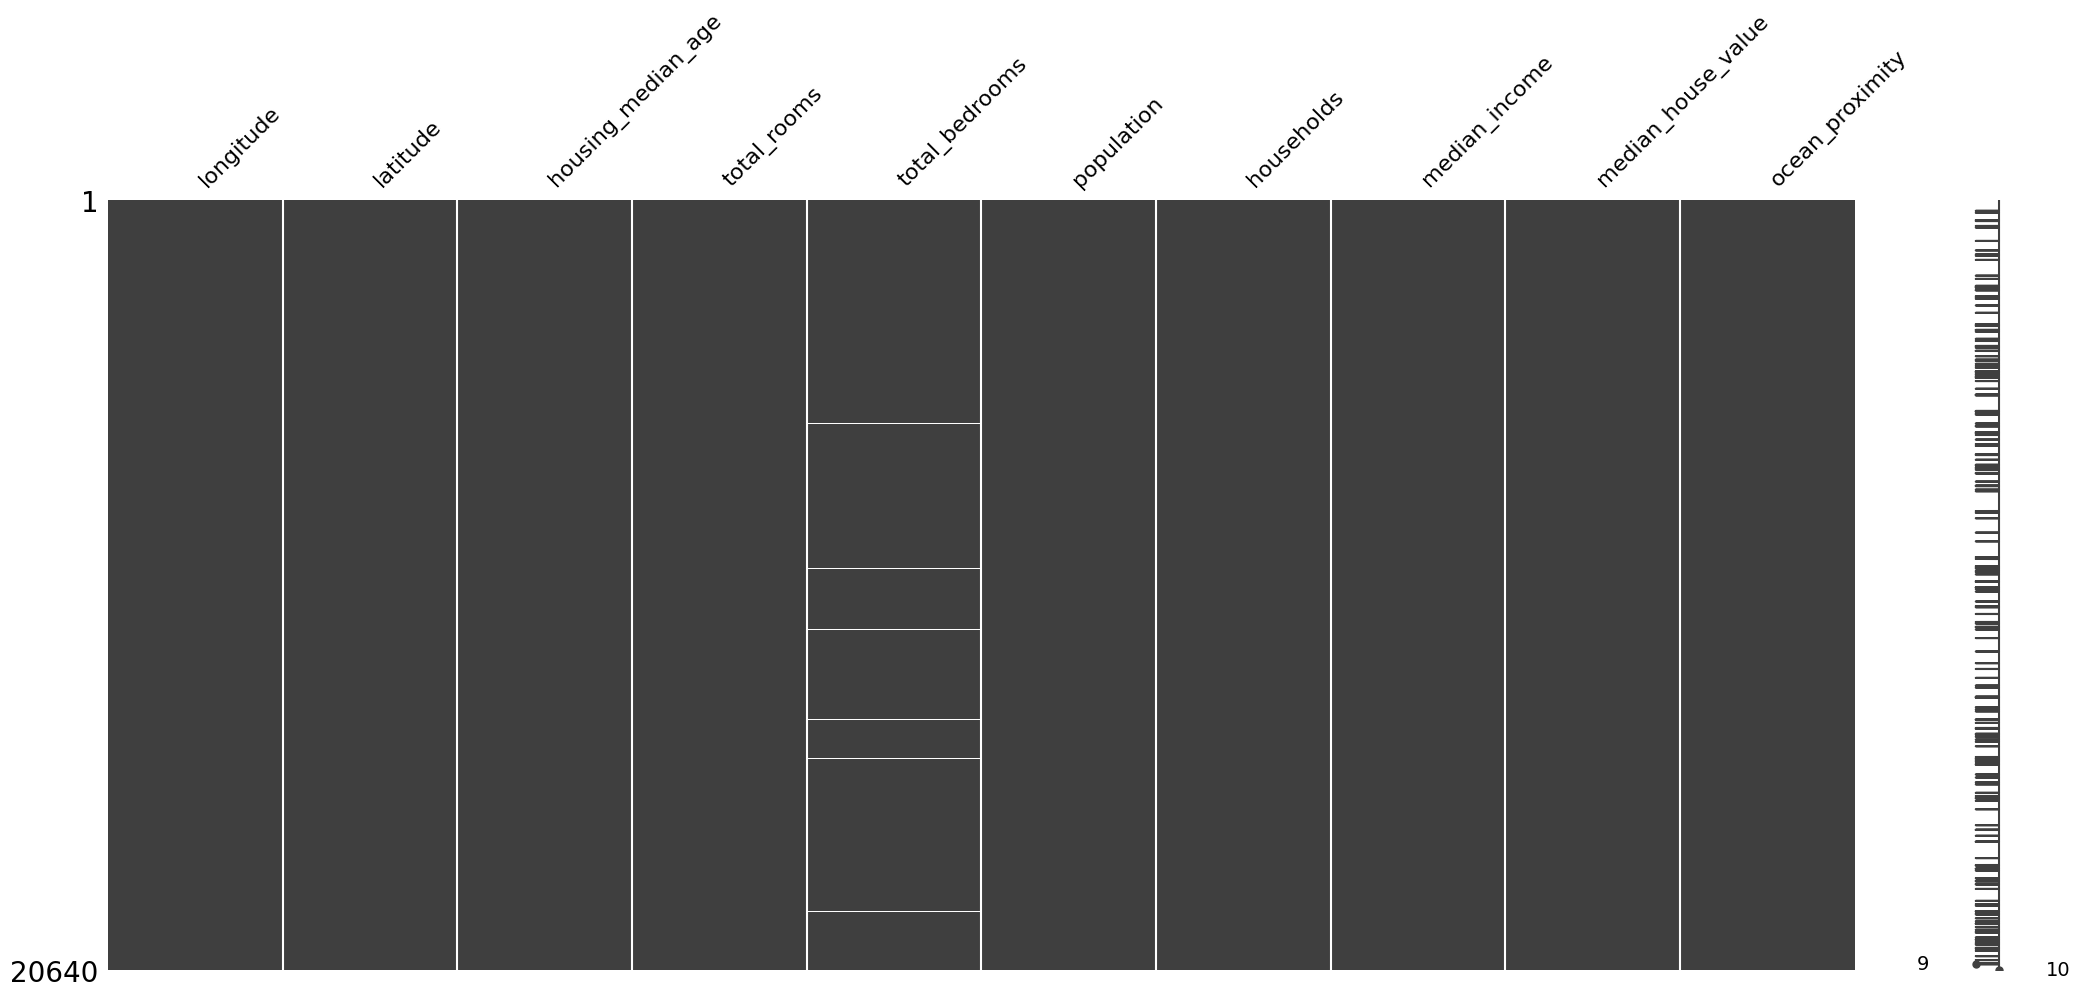

In [6]:
missingno.matrix(df_housing)

In [7]:
oceanValues=df_housing['ocean_proximity'].unique()
replictes=df_housing['ocean_proximity'].value_counts()





<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

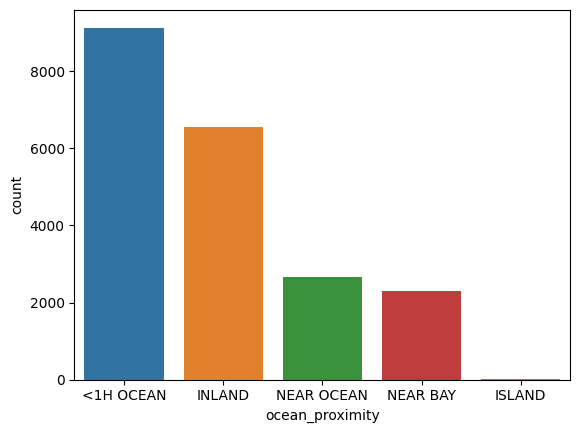

In [8]:
sns.countplot(x='ocean_proximity',data=df_housing, order=replictes.index)

In [9]:

oceanValues


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df_housing['ocean_proximity']=df_housing['ocean_proximity'].replace('<1H OCEAN','1H OCEAN')

In [11]:
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

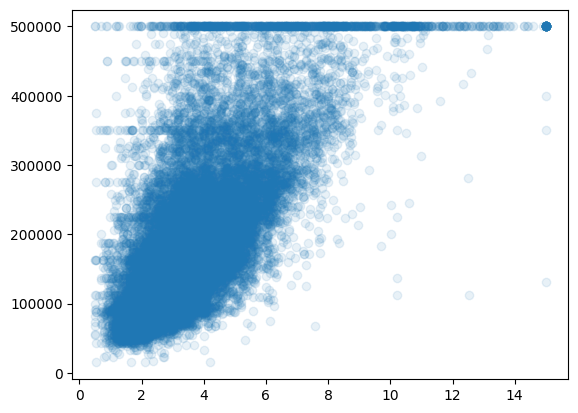

In [12]:
plt.scatter(df_housing['median_income'],df_housing['median_house_value'],alpha=.1)

In [13]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [14]:
house_value_bins=pd.cut(x=df_housing['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],labels=['0-100k','100k-200k','300k-400k','400k-500k','500k-600k','600k<'])

In [15]:
house_value_bins

0        500k-600k
1        400k-500k
2        400k-500k
3        400k-500k
4        400k-500k
           ...    
20635       0-100k
20636       0-100k
20637       0-100k
20638       0-100k
20639       0-100k
Name: median_house_value, Length: 20640, dtype: category
Categories (6, object): ['0-100k' < '100k-200k' < '300k-400k' < '400k-500k' < '500k-600k' < '600k<']

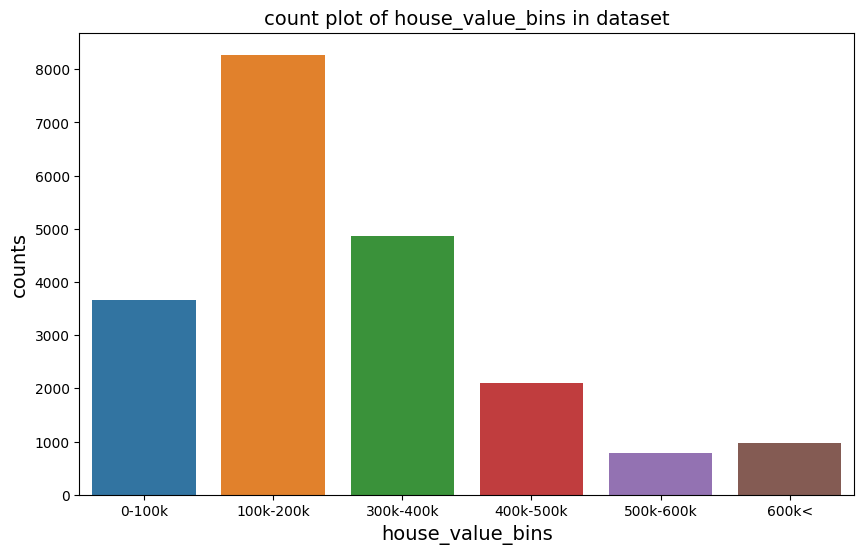

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('count plot of house_value_bins in dataset', fontsize=14,c='k')
plt.xlabel('house_value_bins', fontsize=14,c='k')
plt.ylabel('counts', fontsize=14,c='k')
plt.show()

In [17]:
house_value_bins.unique()

['500k-600k', '400k-500k', '300k-400k', '100k-200k', '0-100k', '600k<']
Categories (6, object): ['0-100k' < '100k-200k' < '300k-400k' < '400k-500k' < '500k-600k' < '600k<']

In [18]:
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

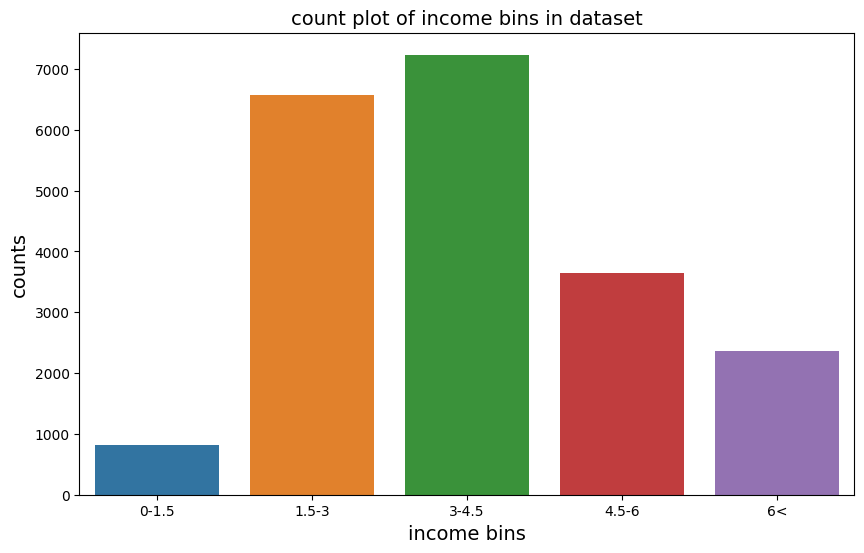

In [19]:
income_bins=pd.cut(x=df_housing['median_income'],
                  bins=[-np.inf,1.5,3,4.5,6,np.inf],
                  labels=['0-1.5','1.5-3','3-4.5','4.5-6','6<'])

plt.figure(figsize=(10,6))
sns.countplot(x=income_bins)
plt.title('count plot of income bins in dataset', fontsize=14,c='k')
plt.xlabel('income bins', fontsize=14,c='k')
plt.ylabel('counts', fontsize=14,c='k')
plt.show()

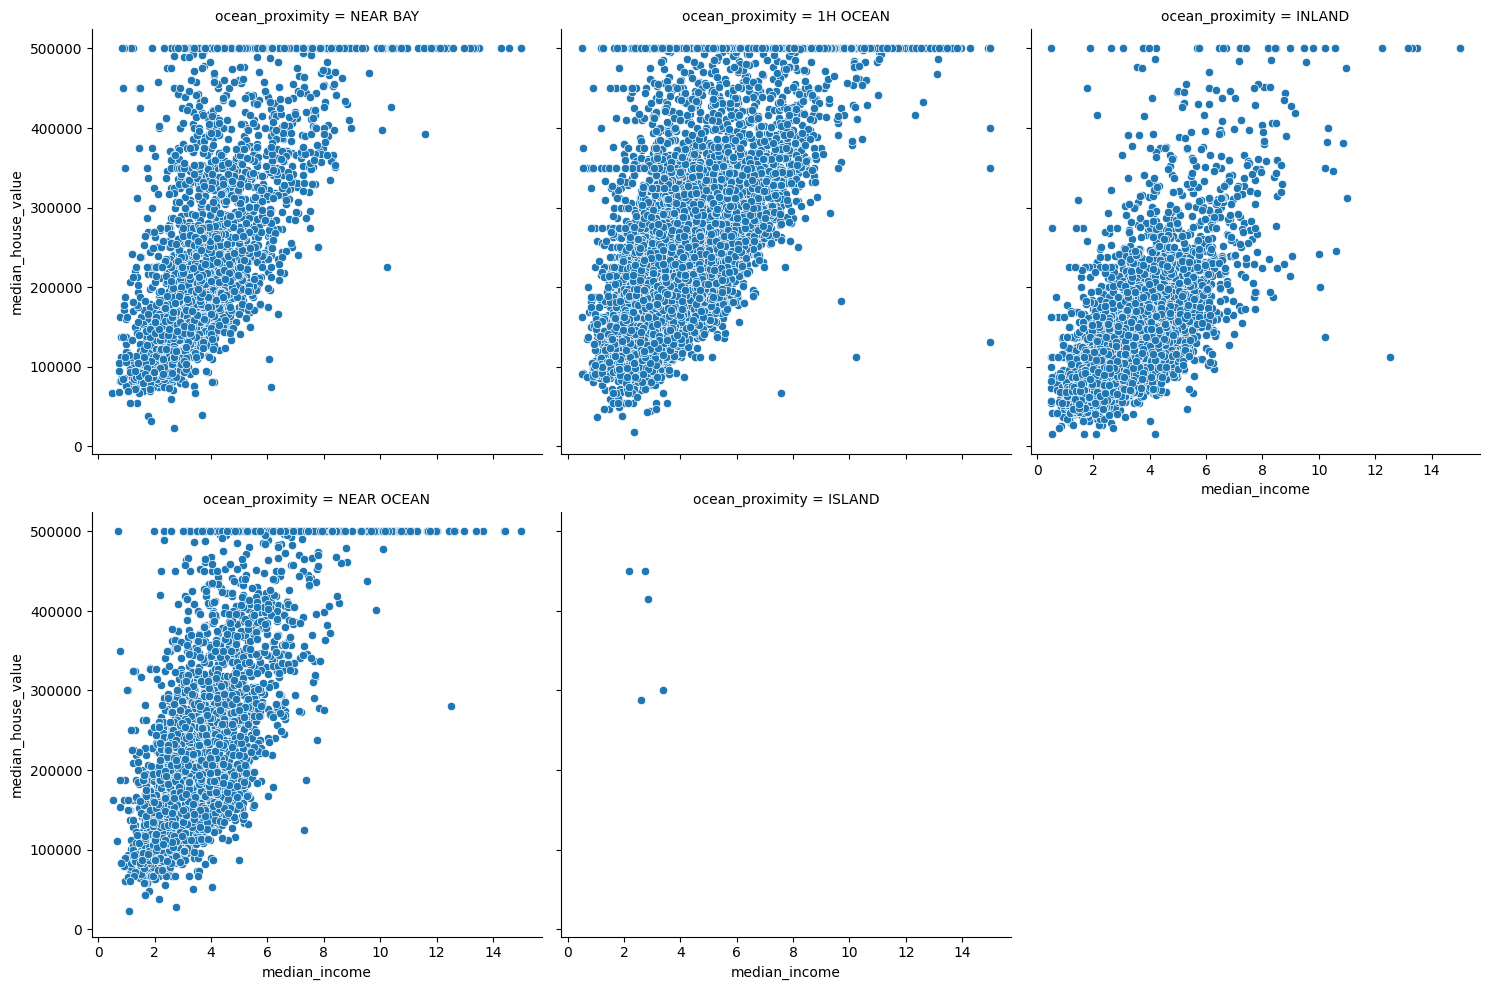

In [20]:
 sns.relplot(x='median_income',
             y='median_house_value',
             data=df_housing,
             col='ocean_proximity',
             kind='scatter'
             ,col_wrap=3)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

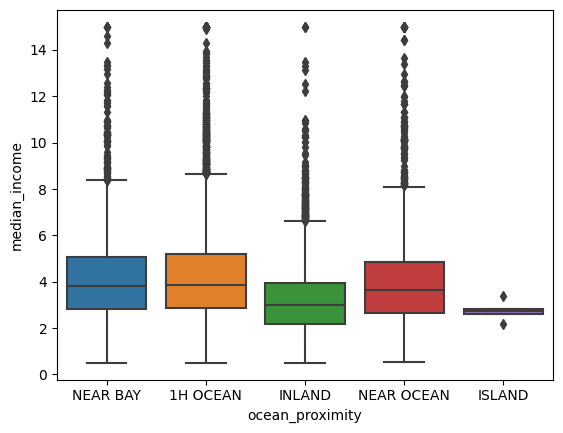

In [21]:
sns.boxplot(y='median_income',data=df_housing ,x='ocean_proximity')

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

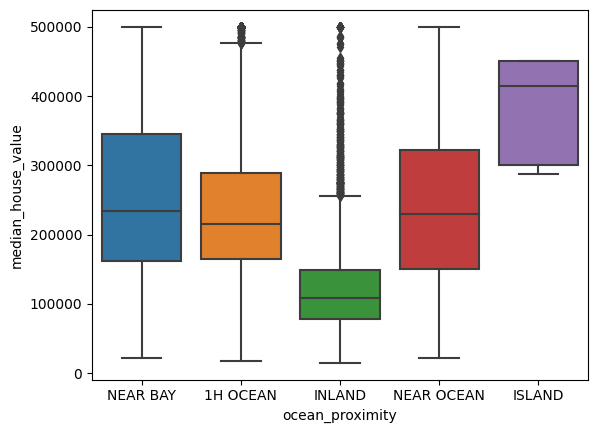

In [22]:
sns.boxplot(y='median_house_value',data=df_housing ,x='ocean_proximity')

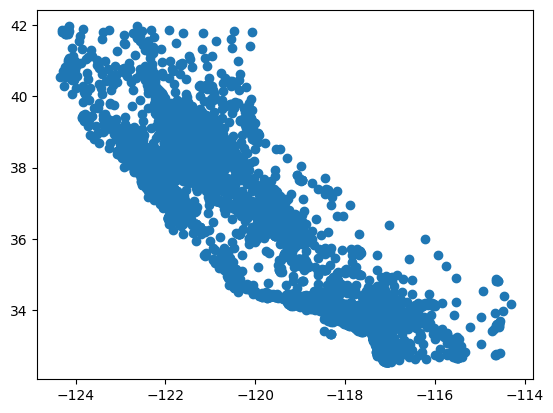

In [23]:
plt.scatter(x=df_housing['longitude'],y=df_housing['latitude'])

In [24]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

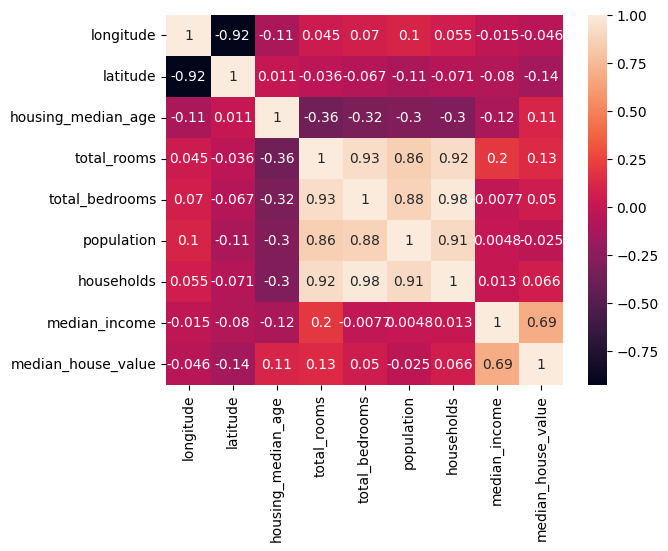

In [25]:
sns.heatmap(df_housing.corr(),annot=True)

In [26]:


df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']



In [27]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)  

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [28]:
X = df_housing.drop(columns=['median_house_value'], axis=1)   
y = df_housing['median_house_value']   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)





In [29]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]

print(num_cols)
print(categ_cols)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
['ocean_proximity']


In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='median')  
imputer.fit(X_train[num_cols])   


X_train_filled = imputer.transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

In [32]:
scaler = StandardScaler()  

X_train_scaled = scaler.fit_transform(X_train_filled)  ## train
X_test_scaled = scaler.transform(X_test_filled)  ## test

In [33]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
X_train_num = num_pipeline.fit_transform(X_train[num_cols])  ## train
X_test_num = num_pipeline.transform(X_test[num_cols])  ## test

In [34]:
categ_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('OHE', OneHotEncoder(sparse=False))
                                ]
                         )

X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])

In [35]:



num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])


categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])


total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
 datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 



In [36]:
#linearRegression

In [37]:
lnReg=LinearRegression()
lnReg.fit(X_train_final,y_train)

LinearRegression()

In [38]:
lnReg.coef_,lnReg.intercept_

(array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
          8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
          6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
        -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772]),
 239967.5707416455)

In [41]:
mse_scores_lin = cross_val_score(estimator=lnReg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_lin = -1 * mse_scores_lin  
rmse_scores_lin = np.sqrt(rmse_scores_lin)

In [42]:
rmse_scores_lin.mean()

67880.14257788868

In [43]:
y_pred_lin = cross_val_predict(estimator=lnReg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))

In [44]:
rmse_pred_lin

67898.88872785706

In [45]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000) 
sgd_reg.fit(X_train_final, y_train)  

SGDRegressor(eta0=0.001, max_iter=10000)

In [46]:
rmse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_sgd = -1 * rmse_scores_sgd   
rmse_scores_sgd = np.sqrt(rmse_scores_sgd)

In [47]:
rmse_scores_sgd.mean()

67989.94699025285

In [48]:
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)

Ridge(alpha=0.9, solver='cholesky')

In [49]:
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)

In [50]:
rmse_scores_ridge.mean()

67880.21922984191

In [51]:
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)

Lasso(alpha=1, max_iter=100000)

In [52]:
lasso_reg.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083])

In [53]:
elasticReg=ElasticNet(alpha=0.1 ,l1_ratio=0.5)

In [54]:
elasticReg.fit(X_train_final,y_train)

ElasticNet(alpha=0.1)

In [55]:
#polynomial
Poly=PolynomialFeatures(degree=2,include_bias=False)

In [56]:
X_poly=Poly.fit_transform(X_train_final)

In [57]:
X_poly.shape

(17544, 152)

In [58]:
polyReg=LinearRegression()
polyReg.fit(X_poly,y_train)

LinearRegression()

In [59]:
#kNN

knnReg=KNeighborsRegressor(n_neighbors=6,weights='uniform',p=2)
knnReg.fit(X_train_final,y_train)

KNeighborsRegressor(n_neighbors=6)

In [63]:
rmse_scores_knn = cross_val_score(estimator=knnReg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_knn = -1 * rmse_scores_knn   
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')




y_pred_knn = cross_val_predict(estimator=knnReg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  

RMSE Scores Using KNN --- [61716.6169 62099.3189 60883.1409 59936.0617 61775.7635]
Mean of RMSE Scores Using KNN --- 61282.1804
RMSE after prediction Using KNN --- 61287.1640


In [64]:
#randomforest
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train) 

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [65]:
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest  
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest  {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest  {rmse_scores_forest.mean():.4f}')




y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')

RMSE Scores Using RandomForest  [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE Scores Using RandomForest  59969.6780
RMSE after prediction Using RandomForest --- 59980.3194


In [ ]:
n_estimators=150, max_depth=6, max_samples=0.8

In [66]:
#tunning
parms={'n_estimators':np.arange(100,500,50),
       'max_depth':np.arange(4,20,2),
      'max_samples':[0.7,0.8,0.9,1]}

rand=RandomizedSearchCV(estimator=forest_reg ,
                        param_distributions=parms,
                        n_iter=20,
                        random_state=122,
                        scoring='neg_mean_squared_error',
                        cv=5,verbose=6)

rand.fit(X_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=14, max_samples=1, n_estimators=450;, score=-13235634203.677 total time=   5.2s
[CV 2/5] END max_depth=14, max_samples=1, n_estimators=450;, score=-13540678996.066 total time=   1.0s
[CV 3/5] END max_depth=14, max_samples=1, n_estimators=450;, score=-13452762109.235 total time=   1.1s
[CV 4/5] END max_depth=14, max_samples=1, n_estimators=450;, score=-13135292026.847 total time=   1.2s
[CV 5/5] END max_depth=14, max_samples=1, n_estimators=450;, score=-13432206038.439 total time=   1.2s
[CV 1/5] END max_depth=14, max_samples=0.7, n_estimators=400;, score=-2430346716.407 total time=  11.3s
[CV 2/5] END max_depth=14, max_samples=0.7, n_estimators=400;, score=-2801990786.095 total time=  11.9s
[CV 3/5] END max_depth=14, max_samples=0.7, n_estimators=400;, score=-2689288847.905 total time=  11.1s
[CV 4/5] END max_depth=14, max_samples=0.7, n_estimators=400;, score=-2464280647.498 total time=  11.3s
[CV 5/5

[CV 5/5] END max_depth=16, max_samples=1, n_estimators=300;, score=-13426835126.928 total time=   0.6s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=350;, score=-2491584214.083 total time=   7.5s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=350;, score=-2876084336.833 total time=   8.2s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=350;, score=-2748868957.662 total time=   8.1s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=350;, score=-2497130060.695 total time=   8.1s
[CV 5/5] END max_depth=12, max_samples=0.9, n_estimators=350;, score=-2674659192.774 total time=   8.7s
[CV 1/5] END max_depth=6, max_samples=0.9, n_estimators=400;, score=-3477660940.500 total time=   5.4s
[CV 2/5] END max_depth=6, max_samples=0.9, n_estimators=400;, score=-3748137857.169 total time=   5.5s
[CV 3/5] END max_depth=6, max_samples=0.9, n_estimators=400;, score=-3687515079.656 total time=   5.6s
[CV 4/5] END max_depth=6, max_samples=0.9, n_estimators=400;, score=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=122, scoring='neg_mean_squared_error',
                   verbose=6)

In [71]:
rand.best_params_
best_forest=rand.best_estimator_

In [72]:
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)

print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest {rmse_pred_tuned_forest:.4f}')

RMSE Scores Using Tuned RandomForest --- [48835.3988 52529.6321 51465.6166 49138.2353 50391.3422]
Mean of RMSE Scores Using Tuned RandomForest --- 50472.0450
RMSE after prediction Using Tuned RandomForest 50491.2359


In [73]:
feat_import_forest = {}   
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score
    

keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()





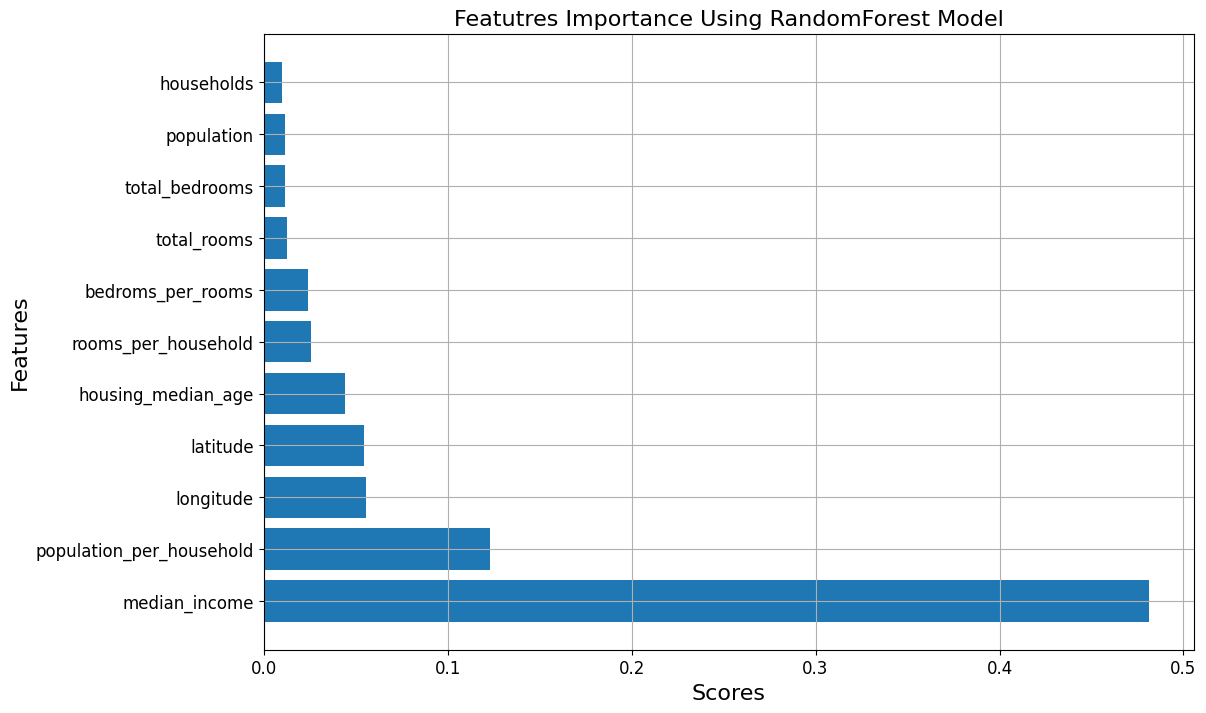

In [74]:

df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

In [76]:
#xgboost
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [77]:
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb  
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')


y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')

RMSE Scores Using Tuned XGBoost --- [46401.218  48678.5008 48205.3615 46523.7734 48333.7256]
Mean of RMSE Scores Using XGBoost --- 47628.5158
RMSE after prediction Using XGBoost --- 47638.2574


In [78]:
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}

In [79]:
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=256,
                                    max_cat_to_oneh...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [ ]:
best_xgb = grid_xgb.best_estimator_  

In [ ]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')




y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  